<a href="https://colab.research.google.com/github/Eng-Abdelrahman-Mostafa-Mohamed/NLP-TFIDF-FromScratch/blob/main/tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Spacy English pipline Installation

In [4]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Imports

In [9]:
import transformers
from transformers import AutoTokenizer , AutoModelForCausalLM
import torch
import numpy as np
import re
import spacy
import nltk
from string import punctuation
torch.cuda.set_device(0)
nlp = spacy.load('en_core_web_lg')
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punctuation')
import re

import nltk
import numpy as np

# import spacy
import torch

torch.cuda.set_device(0)
# nlp = spacy.load("en_core_web_lg")
import re

import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

device = torch.device("cuda" if torch.cuda.is_available else "cpu")
device=torch.device('cuda' if torch.cuda.is_available else 'cpu')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punctuation: Package 'punctuation' not found
[nltk_data]     in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Documents generation using Falcon Causal-LLM  Model and preprocessing

In [5]:
Tokenizer = AutoTokenizer.from_pretrained("ericzzz/falcon-rw-1b-instruct-openorca")
model = AutoModelForCausalLM.from_pretrained("ericzzz/falcon-rw-1b-instruct-openorca").to(device)

# Define system message and instructions
system_message = 'You are a cars expert. Give long answers as text without dividing your response into points'
instruction_1 = 'Compare between BMW cars and Mercedes cars.'
instruction_2 = 'Compare between BMW cars and Peugeot cars.'

# Create prompts
prompt_1 = f'<SYS> {system_message} <INST> {instruction_1} <RESP> '
prompt_2 = f'<SYS> {system_message} <INST> {instruction_2} <RESP> '

# Encode input prompts
encoded_document_1 = Tokenizer.encode(prompt_1, return_tensors='pt', max_length=1024, truncation=True).to(device)
encoded_document_2 = Tokenizer.encode(prompt_2, return_tensors='pt', max_length=1024, truncation=True).to(device)

# Generate documents using the model
generated_doc1 = model.generate(encoded_document_1, max_length=2000,temperature=0.1,repetition_penalty=1.05).to(device)
generated_doc2 = model.generate(encoded_document_2, max_length=1000,temperature =0.1,repetition_penalty=1.05).to(device)

# Decode the generated output
doc1 = Tokenizer.decode(generated_doc1[0],skip_special_tokens=True)
doc2 = Tokenizer.decode(generated_doc2[0],skip_special_tokens=True)

# Print the results
print(f"Generated Document 1:\n{doc1}\n")
print(f"Generated Document 2:\n{doc2}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.62G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/89.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Document 1:
<SYS> You are a cars expert. Give long answers as text without dividing your response into points <INST> Compare between BMW cars and Mercedes cars. <RESP> Comparing BMW and Mercedes cars, it is important to consider factors such as performance, design, safety, comfort, and overall value for money when making a decision. Here's a comparison of the two:

1. Performance:
BMW has been known for its high-performance vehicles since its inception in 1916. The BMW M3, M4, and M5 models are some of the most powerful and fastest production cars available today. These cars have been designed with precision engineering and advanced technology to deliver exceptional driving experience.

Mercedes-Benz, on the other hand, has also produced high-performance vehicles but they tend to be more mainstream and less exclusive compared to BMW. Their range includes various models like the C-Class, E-Class, S-Class, and G-Class, which offer good performance and reliability. However, thei

In [11]:
def preprocess_sentence_gen(doc):
    doc = re.sub(r"^.*?<RESP>", "", doc)
    doc = re.sub(r"<[a-zA-Z0-9]+>", "", doc)
    doc = re.sub(r"\|[a-zA-Z0-9]+\|", "", doc)
    doc = re.sub(r"[></\n]", "", doc)
    doc = re.sub(r".[0-9]" "", "", doc)
    remove_stop_words_pattern = (
        r"\b(?:" + "|".join(map(re.escape, stopwords.words("english"))) + r")\b"
    )
    doc = re.sub(remove_stop_words_pattern, "", doc)
    doc = re.sub(r",+", "", doc)
    doc = re.sub(r"[^\w\s]", "", doc)
    doc = re.sub(r"\s+", " ", doc)
    doc = doc.lower()
    doc = word_tokenize(doc)
    # remove stop words
    doc = [word for word in doc if word not in stopwords.words("english")]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    doc = [lemmatizer.lemmatize(word) for word in doc]
    # remove words with length less than 3
    doc = [word for word in doc if len(word) > 2]
    doc = " ".join(doc)
    return doc.strip()

doc1_preprocessed=preprocess_sentence_gen(doc1)
doc2_preprocessed=preprocess_sentence_gen(doc2)
doc1_preprocessed
doc2_preprocessed

'comparing bmw car peugeot car important consider respective strength weakness comparing term performance reliability comfort safety overall value moneybmw car performance bmw car known highperformance engine deliver excellent fuel efficiency power popular model include bmw bmw bmw bmw vehicle offer driver exhilarating driving experience impressive acceleration time top speed reliability bmw earned reputation durability longevity many bmw model received multiple award quality construction engineering brand commitment excellence ensures customer expect consistent performance dependability time comfort bmw car provide exceptional comfort passenger driver alike feature spacious interior comfortable seat advanced technology feature automatic climate control navigation system customer enjoy smooth ride still enjoying latest automotive innovation safety bmw car prioritize safety else brand implemented various safety feature like antilock brake stability control advanced airbags ensure driver

In [12]:
doc_1_obj=nlp(doc1_preprocessed)
doc_2_obj=nlp(doc2_preprocessed)
print(f'check_that 2 documents has same lenth {len(doc_1_obj)==len(doc_2_obj)}')
unique_words_doc1=set([i.lemma_ for i in doc_1_obj ])
unique_words_doc2=set([i.lemma_ for i in doc_2_obj ])


unique_words_in_all_documents = set()
unique_words_in_all_documents.update(unique_words_doc1)
unique_words_in_all_documents.update(unique_words_doc2)


num_unique_doc1=len(unique_words_doc1)
num_unique_doc2=len(unique_words_doc2)
unique_words_in_all_documents

check_that 2 documents has same lenth False


{'acceleration',
 'accident',
 'account',
 'additionally',
 'advanced',
 'affordable',
 'airbag',
 'alike',
 'also',
 'among',
 'antilock',
 'apart',
 'appeal',
 'appealing',
 'assistance',
 'attractive',
 'automatic',
 'automotive',
 'available',
 'award',
 'base',
 'bmw',
 'brake',
 'brand',
 'budget',
 'budgetfriendly',
 'build',
 'capability',
 'car',
 'cater',
 'cclass',
 'characterize',
 'choice',
 'choose',
 'climate',
 'come',
 'comfort',
 'comfortable',
 'comfortboth',
 'commitment',
 'compare',
 'comparison',
 'competitive',
 'conclusion',
 'consider',
 'consistent',
 'construction',
 'control',
 'cost',
 'curve',
 'customer',
 'decision',
 'deliver',
 'depend',
 'dependability',
 'depreciation',
 'design',
 'designboth',
 'difference',
 'different',
 'distinct',
 'distinctive',
 'diverse',
 'drive',
 'driver',
 'driving',
 'due',
 'durability',
 'durable',
 'earn',
 'eclass',
 'efficiency',
 'elegant',
 'else',
 'engine',
 'engineering',
 'enhance',
 'enjoy',
 'enjoyable',
 

In [13]:
# unique_words=pd.DataFrame({'doc1_preprocessed':list(unique_words_doc1),'doc2_preprocessed':list(unique_words_doc2)})

In [14]:
# unique_words

#Calculate TF-IDF on Selected unique words from scratch(customized)

##TF Calculation

In [15]:
def tf(doc,doc_unique_words):
    dic_words_timed_frequancy = {}
    unique_words_text = [word for word in doc_unique_words]
    for word in set(unique_words_text):
        frequency = doc.count(word) / len(unique_words_text)
        dic_words_timed_frequancy[word] = frequency
    return dic_words_timed_frequancy
tf_values_doc1=tf(doc1_preprocessed,unique_words_doc1)
tf_values_doc2=tf(doc2_preprocessed,unique_words_doc2)

In [16]:
tf_values_doc1

{'since': 0.006060606060606061,
 'must': 0.006060606060606061,
 'offer': 0.03636363636363636,
 'diverse': 0.006060606060606061,
 'level': 0.006060606060606061,
 'decision': 0.006060606060606061,
 'iconic': 0.006060606060606061,
 'reliable': 0.006060606060606061,
 'record': 0.006060606060606061,
 'numerous': 0.006060606060606061,
 'safe': 0.04242424242424243,
 'strong': 0.006060606060606061,
 'model': 0.04242424242424243,
 'proportion': 0.006060606060606061,
 'share': 0.006060606060606061,
 'design': 0.048484848484848485,
 'ultimately': 0.006060606060606061,
 'series': 0.006060606060606061,
 'available': 0.006060606060606061,
 'performancebmw': 0.006060606060606061,
 'experiencemercedesbenz': 0.006060606060606061,
 'vehiclein': 0.006060606060606061,
 'expensive': 0.006060606060606061,
 'safetybmw': 0.006060606060606061,
 'deliver': 0.006060606060606061,
 'make': 0.006060606060606061,
 'inception': 0.006060606060606061,
 'flagship': 0.006060606060606061,
 'exceptional': 0.006060606060606

In [17]:
tf_values_doc2

{'drive': 0.05,
 'offer': 0.025,
 'acceleration': 0.0125,
 'investment': 0.00625,
 'reliable': 0.0125,
 'climate': 0.0125,
 'safe': 0.0625,
 'durability': 0.00625,
 'strong': 0.00625,
 'model': 0.025,
 'build': 0.00625,
 'enjoy': 0.01875,
 'brake': 0.0125,
 'ultimately': 0.00625,
 'seek': 0.00625,
 'experience': 0.0375,
 'excellence': 0.00625,
 'expect': 0.0125,
 'moneybmw': 0.00625,
 'accident': 0.0125,
 'pointpeugeot': 0.00625,
 'deliver': 0.00625,
 'make': 0.0125,
 'exceptional': 0.00625,
 'budgetfriendly': 0.00625,
 'peugeot8': 0.025,
 'else': 0.0125,
 'notable': 0.00625,
 'appeal': 0.0125,
 'preference': 0.00625,
 'highperformance': 0.0125,
 'various': 0.0125,
 'construction': 0.00625,
 'multiple': 0.00625,
 'popular': 0.0125,
 'base': 0.00625,
 'outstanding': 0.00625,
 'excel': 0.01875,
 'advanced': 0.03125,
 'reasonable': 0.00625,
 'power': 0.01875,
 'vehicle': 0.04375,
 'price': 0.0125,
 'assistance': 0.0125,
 'include': 0.01875,
 'high': 0.025,
 'prioritize': 0.0125,
 'ensure'

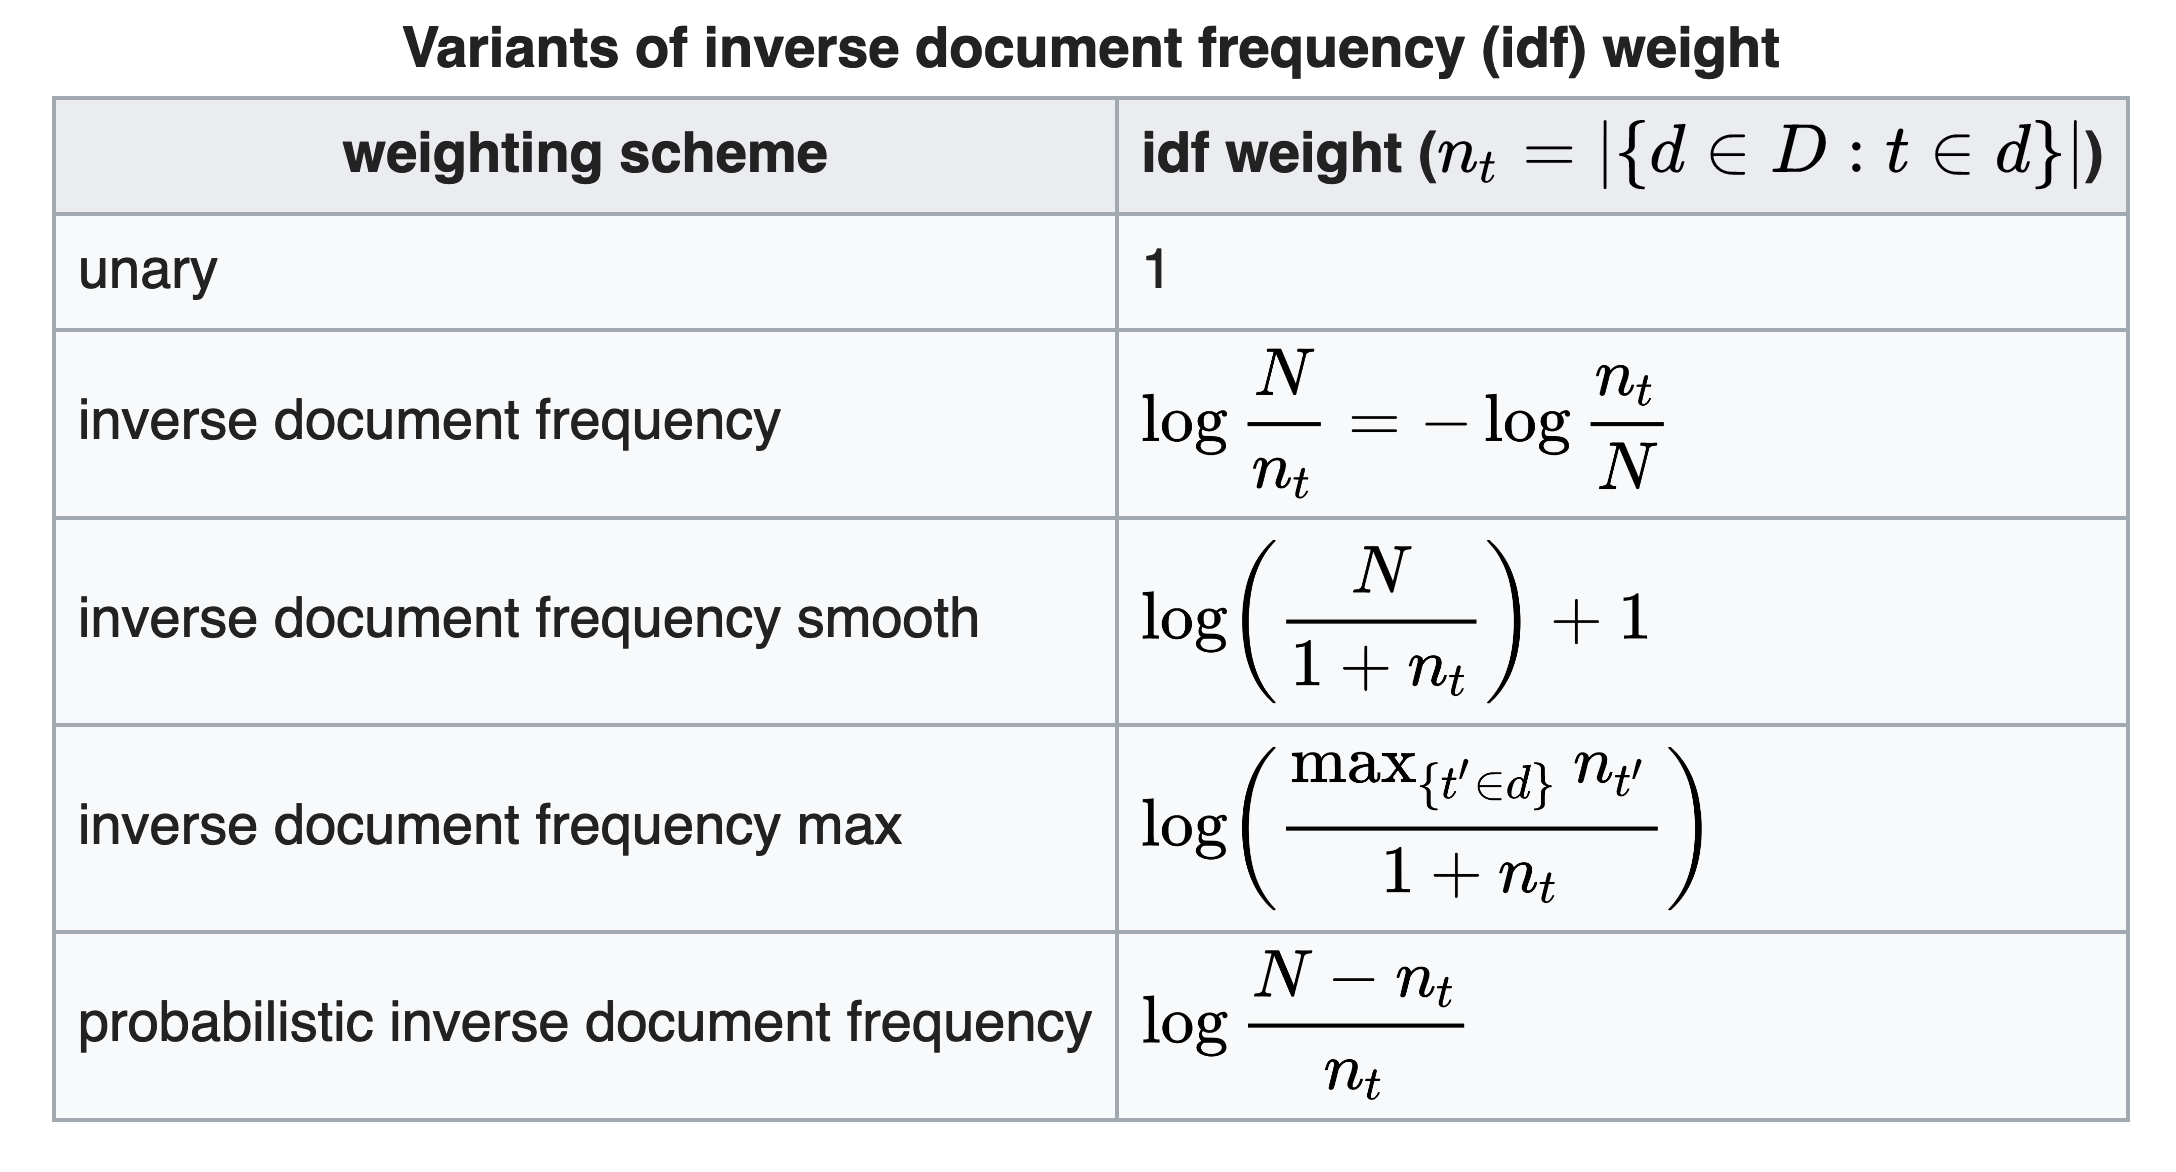

## IDF Calculation

In [18]:
def idf(documents, doc_unique_words):
    total_documents = len(documents)
    idf_values = {}
    for word in doc_unique_words:
        # word=word.text
        num_documents_with_word = sum(1 for doc in documents if word in doc)
        idf_values[word] = np.log((1 + total_documents) / (1 + num_documents_with_word))+1
    return idf_values

In [19]:
idf_values=idf([doc1_preprocessed,doc2_preprocessed], unique_words_in_all_documents)
print(idf_values)

{'since': 1.4054651081081644, 'must': 1.4054651081081644, 'acceleration': 1.4054651081081644, 'diverse': 1.4054651081081644, 'decision': 1.4054651081081644, 'reliable': 1.0, 'numerous': 1.4054651081081644, 'strong': 1.0, 'build': 1.4054651081081644, 'proportion': 1.4054651081081644, 'series': 1.4054651081081644, 'experience': 1.0, 'expect': 1.4054651081081644, 'pointpeugeot': 1.4054651081081644, 'safetybmw': 1.4054651081081644, 'make': 1.0, 'inception': 1.4054651081081644, 'flagship': 1.4054651081081644, 'exceptional': 1.0, 'good': 1.4054651081081644, 'budgetfriendly': 1.4054651081081644, 'notable': 1.4054651081081644, 'cost': 1.4054651081081644, 'production': 1.4054651081081644, 'appeal': 1.0, 'maintenance': 1.4054651081081644, 'highperformance': 1.0, 'various': 1.0, 'sleek': 1.4054651081081644, 'ncap': 1.4054651081081644, 'precision': 1.4054651081081644, 'outstanding': 1.0, 'mainstream': 1.4054651081081644, 'excel': 1.0, 'reasonable': 1.4054651081081644, 'cclass': 1.4054651081081644,

# Finally TF-IDF Calculation


---
  # Tf-IDF=Tf  *  IDF


In [20]:
tfidf_values_doc1={}
for term, tf_value in tf_values_doc1.items():
    idf_value = idf_values.get(term, 0)
    tfidf_values_doc1[term] = tf_value * idf_value

tfidf_values_doc2={}
for term, tf_value in tf_values_doc2.items():
    idf_value = idf_values.get(term, 0)
    tfidf_values_doc2[term] = tf_value * idf_value


In [21]:
tfidf_values_doc1

{'since': 0.008517970352170693,
 'must': 0.008517970352170693,
 'offer': 0.03636363636363636,
 'diverse': 0.008517970352170693,
 'level': 0.008517970352170693,
 'decision': 0.008517970352170693,
 'iconic': 0.008517970352170693,
 'reliable': 0.006060606060606061,
 'record': 0.008517970352170693,
 'numerous': 0.008517970352170693,
 'safe': 0.04242424242424243,
 'strong': 0.006060606060606061,
 'model': 0.04242424242424243,
 'proportion': 0.008517970352170693,
 'share': 0.008517970352170693,
 'design': 0.06814376281736555,
 'ultimately': 0.006060606060606061,
 'series': 0.008517970352170693,
 'available': 0.008517970352170693,
 'performancebmw': 0.008517970352170693,
 'experiencemercedesbenz': 0.008517970352170693,
 'vehiclein': 0.008517970352170693,
 'expensive': 0.008517970352170693,
 'safetybmw': 0.008517970352170693,
 'deliver': 0.006060606060606061,
 'make': 0.006060606060606061,
 'inception': 0.008517970352170693,
 'flagship': 0.008517970352170693,
 'exceptional': 0.0060606060606060

In [22]:
print("TF-IDF For Document 2 is /n")
print("--------------------------------------------------------                     ")
tfidf_values_doc2

TF-IDF For Document 2 is /n
--------------------------------------------------------                     


{'drive': 0.07027325540540823,
 'offer': 0.025,
 'acceleration': 0.017568313851352057,
 'investment': 0.008784156925676028,
 'reliable': 0.0125,
 'climate': 0.017568313851352057,
 'safe': 0.0625,
 'durability': 0.008784156925676028,
 'strong': 0.00625,
 'model': 0.025,
 'build': 0.008784156925676028,
 'enjoy': 0.02635247077702808,
 'brake': 0.017568313851352057,
 'ultimately': 0.00625,
 'seek': 0.008784156925676028,
 'experience': 0.0375,
 'excellence': 0.008784156925676028,
 'expect': 0.017568313851352057,
 'moneybmw': 0.008784156925676028,
 'accident': 0.017568313851352057,
 'pointpeugeot': 0.008784156925676028,
 'deliver': 0.00625,
 'make': 0.0125,
 'exceptional': 0.00625,
 'budgetfriendly': 0.008784156925676028,
 'peugeot8': 0.035136627702704114,
 'else': 0.017568313851352057,
 'notable': 0.008784156925676028,
 'appeal': 0.0125,
 'preference': 0.00625,
 'highperformance': 0.0125,
 'various': 0.0125,
 'construction': 0.008784156925676028,
 'multiple': 0.00625,
 'popular': 0.0125,
 '

In [23]:
# Extract the values of the dictionary
tfidf_values_doc1_values = list(tfidf_values_doc1.values())
tfidf_values_doc2_values = list(tfidf_values_doc2.values())
# Calculate the sum of the squares of the values
sum_of_squares_doc1 = np.sum([i**2 for i in tfidf_values_doc1_values])
sum_of_squares_doc2 = np.sum([i**2 for i in tfidf_values_doc2_values])

# Normalize the TF-IDF values
tfidf_values_doc1_normalized = {k: v / sum_of_squares_doc1 for k, v in tfidf_values_doc1.items()}
tfidf_values_doc2_normalized = {k: v / sum_of_squares_doc2 for k, v in tfidf_values_doc2.items()}


# Print the normalized TF-IDF values
print("TF-IDF For Document 1 is \n")
print("--------------------------------------------------------                     ")
print(f'tfidf doc1 normalized --------------->  {tfidf_values_doc1_normalized}')
print(f'tfidf doc2 normalized --------------->  {tfidf_values_doc2_normalized}')


TF-IDF For Document 1 is 

--------------------------------------------------------                     
tfidf doc1 normalized --------------->  {'since': 0.1597630943935666, 'must': 0.1597630943935666, 'offer': 0.6820365449354346, 'diverse': 0.1597630943935666, 'level': 0.1597630943935666, 'decision': 0.1597630943935666, 'iconic': 0.1597630943935666, 'reliable': 0.1136727574892391, 'record': 0.1597630943935666, 'numerous': 0.1597630943935666, 'safe': 0.7957093024246739, 'strong': 0.1136727574892391, 'model': 0.7957093024246739, 'proportion': 0.1597630943935666, 'share': 0.1597630943935666, 'design': 1.2781047551485327, 'ultimately': 0.1136727574892391, 'series': 0.1597630943935666, 'available': 0.1597630943935666, 'performancebmw': 0.1597630943935666, 'experiencemercedesbenz': 0.1597630943935666, 'vehiclein': 0.1597630943935666, 'expensive': 0.1597630943935666, 'safetybmw': 0.1597630943935666, 'deliver': 0.1136727574892391, 'make': 0.1136727574892391, 'inception': 0.1597630943935666, 

# TF-IDF Using SKlearn Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed documents
tfidf_matrix = vectorizer.fit_transform([doc1_preprocessed,doc2_preprocessed])

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary to hold the tfidf values for each document
tfidf_values_doc1 = dict(zip(feature_names, tfidf_matrix.toarray()[0]))
tfidf_values_doc2 = dict(zip(feature_names, tfidf_matrix.toarray()[1]))

In [25]:
tfidf_values_doc1
#the diffrent between 2 values of TF-IDF between sklearn and my customized TF-IDF that i select the unique words with thresh hold filter with value 3

{'acceleration': 0.0,
 'accident': 0.0,
 'account': 0.044205953528775176,
 'additionally': 0.0,
 'advanced': 0.03145290002131671,
 'affordable': 0.03145290002131671,
 'airbags': 0.0,
 'alike': 0.0,
 'also': 0.06290580004263342,
 'among': 0.044205953528775176,
 'antilock': 0.0,
 'apart': 0.044205953528775176,
 'appeal': 0.0,
 'appealing': 0.03145290002131671,
 'assistance': 0.0,
 'attractive': 0.03145290002131671,
 'automatic': 0.0,
 'automotive': 0.0,
 'available': 0.044205953528775176,
 'award': 0.06290580004263342,
 'based': 0.0,
 'better': 0.044205953528775176,
 'bmw': 0.5032464003410674,
 'brake': 0.0,
 'brand': 0.06290580004263342,
 'budget': 0.08841190705755035,
 'budgetfriendly': 0.0,
 'build': 0.0,
 'capability': 0.0,
 'car': 0.15726450010658355,
 'catering': 0.08841190705755035,
 'cclass': 0.044205953528775176,
 'characterized': 0.044205953528775176,
 'choice': 0.03145290002131671,
 'choosing': 0.044205953528775176,
 'climate': 0.0,
 'come': 0.0,
 'comfort': 0.1258116000852668